This notebook is part of the `clifford` documentation: https://clifford.readthedocs.io/.

# Visualization tools

In this example we will look at some external tools that can be used with `clifford` to help visualize geometric objects.

The two tools available are:

* `pyganja` ([github](https://github.com/pygae/pyganja))
* `mpl_toolkits.clifford` ([github](https://github.com/pygae/mpl_toolkits.clifford))

Both of these can be installed with `pip install` followed by the package name above.

## G2C

Let's start by creating some objects in 2d Conformal Geometric Algebra to visualize:

In [1]:
from clifford.g2c import *

In [2]:
point = up(2*e1+e2)
line = up(3*e1 + 2*e2) ^ up(3*e1 - 2*e2) ^ einf
circle = up(e1) ^ up(-e1 + 2*e2) ^ up(-e1 - 2*e2)

We'll create copies of the point and line reflected in the circle, using $X = C\hat X\tilde C$, where $\hat X$ is the grade involution.

In [3]:
point_refl = circle * point.gradeInvol() * ~circle
line_refl = circle * line.gradeInvol() * ~circle

### ``pyganja``

pyganja is a python interface to the `ganja.js` ([github](https://github.com/enkimute/ganja.js)) library.
To use it, typically we need to import two names from the library:

In [4]:
from pyganja import GanjaScene, draw
import pyganja; pyganja.__version__

/home/davibarreira/miniconda3/envs/clifford/lib/python3.9/site-packages/pyganja/__init__.py:2: UserWarning: Failed to import cef_gui, cef functions will be unavailable
  from .script_api import *


'0.0.15'

`GanjaScene` lets us build scenes out of geometric objects, with attached labels and RGB colors:

In [5]:
sc = GanjaScene()
sc.add_object(point, color=(255, 0, 0), label='point')
sc.add_object(line, color=(0, 255, 0), label='line')
sc.add_object(circle, color=(0, 0, 255), label='circle')

In [6]:
sc_refl = GanjaScene()
sc_refl.add_object(point_refl, color=(128, 0, 0), label='point_refl')
sc_refl.add_object(line_refl, color=(0, 128, 0), label='line_refl')

Once we've built our scene, we can `draw` it, specifying a `scale` (which here we use to zoom out), and the signature of our algebra (which defaults to conformal 3D):

In [9]:
draw(sc, sig=layout.sig, scale=0.5, new_window=True)

Gtk-Message: 17:25:26.313: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:25:26.371: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:26.372: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:27.120: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:25:27.176: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:27.177: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


A cool feature of ``GanjaScene`` is the ability to use `+` to draw both scenes together:

In [10]:
draw(sc + sc_refl, sig=layout.sig, scale=0.5, new_window=True)

Gtk-Message: 17:25:44.852: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:25:44.916: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:44.917: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:45.613: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:25:45.672: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:25:45.673: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


### `mpl_toolkits.clifford`

While `ganja.js` produces great diagrams, it's hard to combine them with other plotting tools.
`mpl_toolkits.clifford` works within `matplotlib`.

In [13]:
from matplotlib import pyplot as plt
plt.ioff()  # we'll ask for plotting when we want it

# if you're editing this locally, you'll get an interactive UI if you uncomment the following
#
#    %matplotlib notebook

from mpl_toolkits.clifford import plot
import mpl_toolkits.clifford; mpl_toolkits.clifford.__version__

'0.0.3'

Assembling the plot is a lot more work, but we also get much more control:

/tmp/ipykernel_11421/3992657548.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax_both.legend()


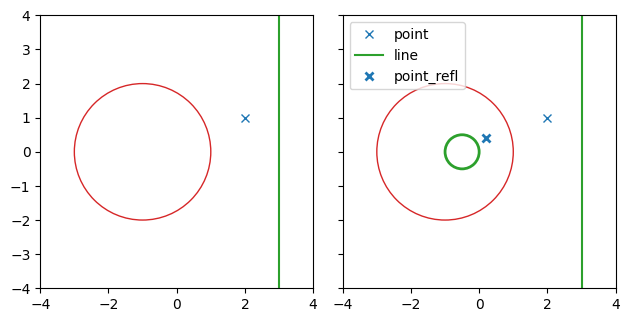

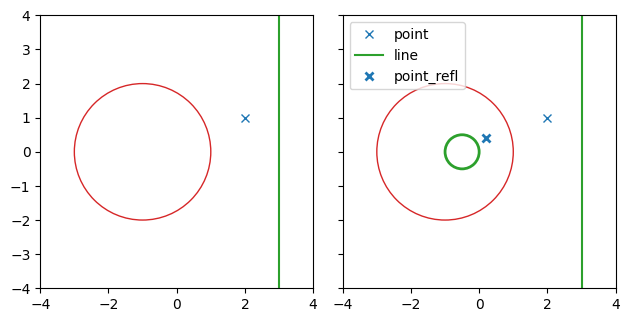

In [14]:
# standard matplotlib stuff - construct empty plots side-by-side, and set the scaling
fig, (ax_before, ax_both) = plt.subplots(1, 2, sharex=True, sharey=True)
ax_before.set(xlim=[-4, 4], ylim=[-4, 4], aspect='equal')
ax_both.set(xlim=[-4, 4], ylim=[-4, 4], aspect='equal')

# plot the objects before reflection on both plots
for ax in (ax_before, ax_both):
    plot(ax, [point], color='tab:blue', label='point', marker='x', linestyle=' ')
    plot(ax, [line], color='tab:green', label='line')
    plot(ax, [circle], color='tab:red', label='circle')

# plot the objects after reflection, with thicker lines
plot(ax_both, [point_refl], color='tab:blue', label='point_refl',  marker='x', linestyle=' ', markeredgewidth=2)
plot(ax_both, [line_refl], color='tab:green', label='line_refl', linewidth=2)

fig.tight_layout()
ax_both.legend()

# show the figure
fig

## G3C

Let's repeat the above, but with 3D Conformal Geometric Algebra.
Note that if you're viewing these docs in a jupyter notebook, the lines below will replace all your 2d variables with 3d ones

In [15]:
from clifford.g3c import *

In [16]:
point = up(2*e1+e2)
line = up(3*e1 + 2*e2) ^ up(3*e1 - 2*e2) ^ einf
circle = up(e1) ^ up(-e1 + 1.6*e2 + 1.2*e3) ^ up(-e1 - 1.6*e2 - 1.2*e3)
sphere = up(3*e1) ^ up(e1) ^ up(2*e1 + e2) ^ up(2*e1 + e3)

In [17]:
# note that due to floating point rounding, we need to truncate back to a single grade here, with ``(grade)``
point_refl = homo((circle * point.gradeInvol() * ~circle)(1))
line_refl = (circle * line.gradeInvol() * ~circle)(3)
sphere_refl = (circle * sphere.gradeInvol() * ~circle)(4)

### ``pyganja``

Once again, we can create a pair of scenes exactly as before

In [18]:
sc = GanjaScene()
sc.add_object(point, color=(255, 0, 0), label='point')
sc.add_object(line, color=(0, 255, 0), label='line')
sc.add_object(circle, color=(0, 0, 255), label='circle')
sc.add_object(sphere, color=(0, 255, 255), label='sphere')

In [19]:
sc_refl = GanjaScene()
sc_refl.add_object(point_refl, color=(128, 0, 0), label='point_refl')
sc_refl.add_object(line_refl.normal(), color=(0, 128, 0), label='line_refl')
sc_refl.add_object(sphere_refl.normal(), color=(0, 128, 128), label='sphere_refl')

But this time, when we draw them we don't need to pass `sig`.
Better yet, we can rotate the 3D world around using left click, pan with right click, and zoom with the scroll wheel.

In [20]:
draw(sc + sc_refl, scale=0.5, new_window=True)

Gtk-Message: 17:27:46.343: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:27:46.413: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:27:46.414: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:27:47.199: Failed to load module "appmenu-gtk-module"
Gtk-Message: 17:27:47.253: Failed to load module "canberra-gtk-module"
Gtk-Message: 17:27:47.254: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


Some more example of using `pyganja` to visualize 3D CGA can be found in the [interpolation](./interpolation.ipynb) and [clustering](./clustering.ipynb) notebooks.

### `mpl_toolkits.clifford`

The 3D approach for `matplotlib` is much the same.
Note that due to poor handling of rounding errors in `clifford.tools.classify`, a call to `.normal()` is needed.
Along with explicit grade selection, this is a useful trick to try and get something to render which otherwise would not.

In [21]:
# standard matplotlib stuff - construct empty plots side-by-side, and set the scaling
fig, (ax_before, ax_both) = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize=(8, 4))
ax_before.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])
ax_both.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])

# plot the objects before reflection on both plots
for ax in (ax_before, ax_both):
    plot(ax, [point], color='tab:red', label='point', marker='x', linestyle=' ')
    plot(ax, [line], color='tab:green', label='line')
    plot(ax, [circle], color='tab:blue', label='circle')
    plot(ax, [sphere], color='tab:cyan')  # labels do not work for spheres: pygae/mpl_toolkits.clifford#5

# plot the objects after reflection
plot(ax_both, [point_refl], color='tab:red', label='point_refl', marker='x', linestyle=' ', markeredgewidth=2)
plot(ax_both, [line_refl.normal()], color='tab:green', label='line_refl', linewidth=2)
plot(ax_both, [sphere_refl], color='tab:cyan')

fig.tight_layout()
ax_both.legend()

# show the figure
fig

TypeError: do_3d_projection() missing 1 required positional argument: 'renderer'

<Figure size 800x400 with 2 Axes>

Error in callback <function _draw_all_if_interactive at 0x7fb04d54a4c0> (for post_execute):


TypeError: do_3d_projection() missing 1 required positional argument: 'renderer'

TypeError: do_3d_projection() missing 1 required positional argument: 'renderer'

<Figure size 800x400 with 2 Axes>

Some more example of using `mpl_toolkits.clifford` to visualize 3D CGA can be found in the `examples` folder of the `mpl_toolkits.clifford` repositiory, [here](https://github.com/pygae/mpl_toolkits.clifford/tree/master/examples).